In [1]:
import torch
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

Let's define a discrete distribution over 6 outcomes and sample from it.

**Unlike** MxNet, the rows of input for *torch.multinomial* do not need to sum to one (in which case we use the values as weights), but must be non-negative, finite and have a non-zero sum.

In [2]:
probabilities = torch.ones(6).float()
torch.multinomial(probabilities, 1)

tensor([0])

Let's draw from it multiple times.

Parameter *replacement* decides whether to draw with replacement or not

In [3]:
print(torch.multinomial(probabilities, num_samples = 10, replacement = True))
print(torch.multinomial(probabilities, num_samples=50, replacement = True).reshape((5,10)))

tensor([4, 3, 0, 5, 3, 5, 4, 3, 5, 5])
tensor([[5, 2, 3, 2, 1, 4, 2, 1, 1, 3],
        [4, 5, 5, 5, 3, 3, 5, 3, 2, 0],
        [2, 2, 1, 2, 0, 5, 4, 2, 3, 5],
        [5, 5, 2, 1, 3, 3, 4, 0, 0, 5],
        [2, 3, 2, 3, 2, 4, 5, 0, 0, 4]])


Let's see what happens for 1000 samples.

In [4]:
rolls = torch.multinomial(probabilities, 1000, replacement = True)
counts = torch.zeros((6,1000)).float()
totals = torch.zeros(6).float()
for i, roll in enumerate(rolls):
    totals[int(roll.item())] += 1
    counts[:, i] = totals

To start, we can inspect the nal tally at the end of rolls.

In [5]:
totals / 1000

tensor([0.1490, 0.1590, 0.1740, 0.1870, 0.1680, 0.1630])

Let's look at the counts.

In [6]:
counts

tensor([[  0.,   0.,   0.,  ..., 149., 149., 149.],
        [  0.,   0.,   0.,  ..., 159., 159., 159.],
        [  1.,   1.,   1.,  ..., 174., 174., 174.],
        [  0.,   0.,   0.,  ..., 186., 187., 187.],
        [  0.,   1.,   2.,  ..., 167., 167., 168.],
        [  0.,   0.,   0.,  ..., 163., 163., 163.]])

Normalizing by the number of tosses, we get:

In [7]:
x = torch.arange(1000).reshape((1,1000)) + 1
estimates = counts / x
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,100])
print(estimates[:,-1])

tensor([0., 0., 1., 0., 0., 0.])
tensor([0.0000, 0.0000, 0.5000, 0.0000, 0.5000, 0.0000])
tensor([0.1188, 0.1881, 0.1782, 0.1782, 0.1782, 0.1584])
tensor([0.1490, 0.1590, 0.1740, 0.1870, 0.1680, 0.1630])


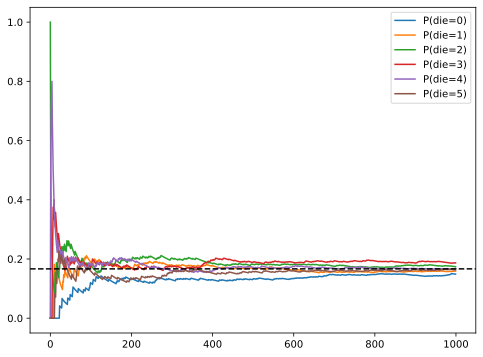

In [8]:
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(estimates[i, :].numpy(), label=("P(die=" + str(i) +")"))
plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()